# Results Exploration

In [1]:
import sys
sys.path.append('./../src/')

import os
import ioutil

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

%matplotlib inline

In [15]:
ref_feature_dir = './../../data/to_analysis'
ref_results_dir = './../../data/outputs/model_comparison_pfs'

In [16]:
filter_cats = [
    label for label in os.listdir(ref_feature_dir)
    if not label.endswith('.csv') and not label.startswith('.')
]
df_y = np.squeeze(
    pd.read_csv('./../../data/to_analysis/target.csv', index_col=0).values
)

In [17]:
results = {}
for filter_cat in filter_cats:

    path_filter_cat_feature_sets = ioutil.relative_paths(
        os.path.join(ref_feature_dir, filter_cat), target_format='.csv'
    )
    results[filter_cat] = []
    for num, path_feature_set in enumerate(path_filter_cat_feature_sets):
        
        try:
            path_results = os.path.join(
                ref_results_dir, filter_cat, os.path.basename(path_feature_set)
            )
            results[filter_cat].append(pd.read_csv(path_results, index_col=0))
        except:
            pass

./../../data/outputs/model_comparison_pfs/gradient/ct0_pet0_clinical.csv
./../../data/outputs/model_comparison_pfs/gradient/ct0_pet1_clinical.csv
./../../data/outputs/model_comparison_pfs/gradient/ct0_pet2_clinical.csv
./../../data/outputs/model_comparison_pfs/gradient/ct0_pet3_clinical.csv
./../../data/outputs/model_comparison_pfs/gradient/ct0_pet4_clinical.csv
./../../data/outputs/model_comparison_pfs/gradient/ct1_pet0_clinical.csv
./../../data/outputs/model_comparison_pfs/gradient/ct1_pet1_clinical.csv
./../../data/outputs/model_comparison_pfs/gradient/ct1_pet2_clinical.csv
./../../data/outputs/model_comparison_pfs/gradient/ct1_pet3_clinical.csv
./../../data/outputs/model_comparison_pfs/gradient/ct1_pet4_clinical.csv
./../../data/outputs/model_comparison_pfs/gradient/ct2_pet0_clinical.csv
./../../data/outputs/model_comparison_pfs/gradient/ct2_pet1_clinical.csv
./../../data/outputs/model_comparison_pfs/gradient/ct2_pet2_clinical.csv
./../../data/outputs/model_comparison_pfs/gradient/

./../../data/outputs/model_comparison_pfs/exponential/ct0_pet1_clinical.csv
./../../data/outputs/model_comparison_pfs/exponential/ct0_pet2_clinical.csv
./../../data/outputs/model_comparison_pfs/exponential/ct0_pet3_clinical.csv
./../../data/outputs/model_comparison_pfs/exponential/ct0_pet4_clinical.csv
./../../data/outputs/model_comparison_pfs/exponential/ct1_pet0_clinical.csv
./../../data/outputs/model_comparison_pfs/exponential/ct1_pet1_clinical.csv
./../../data/outputs/model_comparison_pfs/exponential/ct1_pet2_clinical.csv
./../../data/outputs/model_comparison_pfs/exponential/ct1_pet3_clinical.csv
./../../data/outputs/model_comparison_pfs/exponential/ct1_pet4_clinical.csv
./../../data/outputs/model_comparison_pfs/exponential/ct2_pet0_clinical.csv
./../../data/outputs/model_comparison_pfs/exponential/ct2_pet1_clinical.csv
./../../data/outputs/model_comparison_pfs/exponential/ct2_pet2_clinical.csv
./../../data/outputs/model_comparison_pfs/exponential/ct2_pet3_clinical.csv
./../../data

./../../data/outputs/model_comparison_pfs/wavelet-HLL/ct0_pet0_clinical.csv
./../../data/outputs/model_comparison_pfs/wavelet-HLL/ct0_pet1_clinical.csv
./../../data/outputs/model_comparison_pfs/wavelet-HLL/ct0_pet2_clinical.csv
./../../data/outputs/model_comparison_pfs/wavelet-HLL/ct0_pet3_clinical.csv
./../../data/outputs/model_comparison_pfs/wavelet-HLL/ct0_pet4_clinical.csv
./../../data/outputs/model_comparison_pfs/wavelet-HLL/ct1_pet0_clinical.csv
./../../data/outputs/model_comparison_pfs/wavelet-HLL/ct1_pet1_clinical.csv
./../../data/outputs/model_comparison_pfs/wavelet-HLL/ct1_pet2_clinical.csv
./../../data/outputs/model_comparison_pfs/wavelet-HLL/ct1_pet3_clinical.csv
./../../data/outputs/model_comparison_pfs/wavelet-HLL/ct1_pet4_clinical.csv
./../../data/outputs/model_comparison_pfs/wavelet-HLL/ct2_pet0_clinical.csv
./../../data/outputs/model_comparison_pfs/wavelet-HLL/ct2_pet1_clinical.csv
./../../data/outputs/model_comparison_pfs/wavelet-HLL/ct2_pet2_clinical.csv
./../../data

## Optimal discretization level and filter type
* Heat map of discretizatin levels and filter types based on he absolute max score from each level (no matter what algorithm aso.).

In [18]:
num_filters = 18
num_graylevels = 25
img_prep_results = np.zeros((num_filters, num_graylevels), dtype=float)

for filter_num, (filter_label, exp_results) in enumerate(results.items()):
    for discr_num, exp_result in enumerate(exp_results):
        # Compute mean performance of all models and select the 
        # absolute maximum as representative for filter and discr level combo.
        model_perf = exp_result.groupby('model').mean()['avg_test_score']
        img_prep_results[filter_num, discr_num] = np.max(model_perf.values)

In [19]:
bins = np.linspace(30, 130, 4, dtype=int)

discr_labels = []
for ct_bins in np.append(bins, 256):
    for pet_bins in np.append(bins, 512):
        discr_labels.append('CT{} | PET{}'.format(ct_bins, pet_bins))
discr_labels[:5]

['CT30 | PET30',
 'CT30 | PET63',
 'CT30 | PET96',
 'CT30 | PET130',
 'CT30 | PET512']

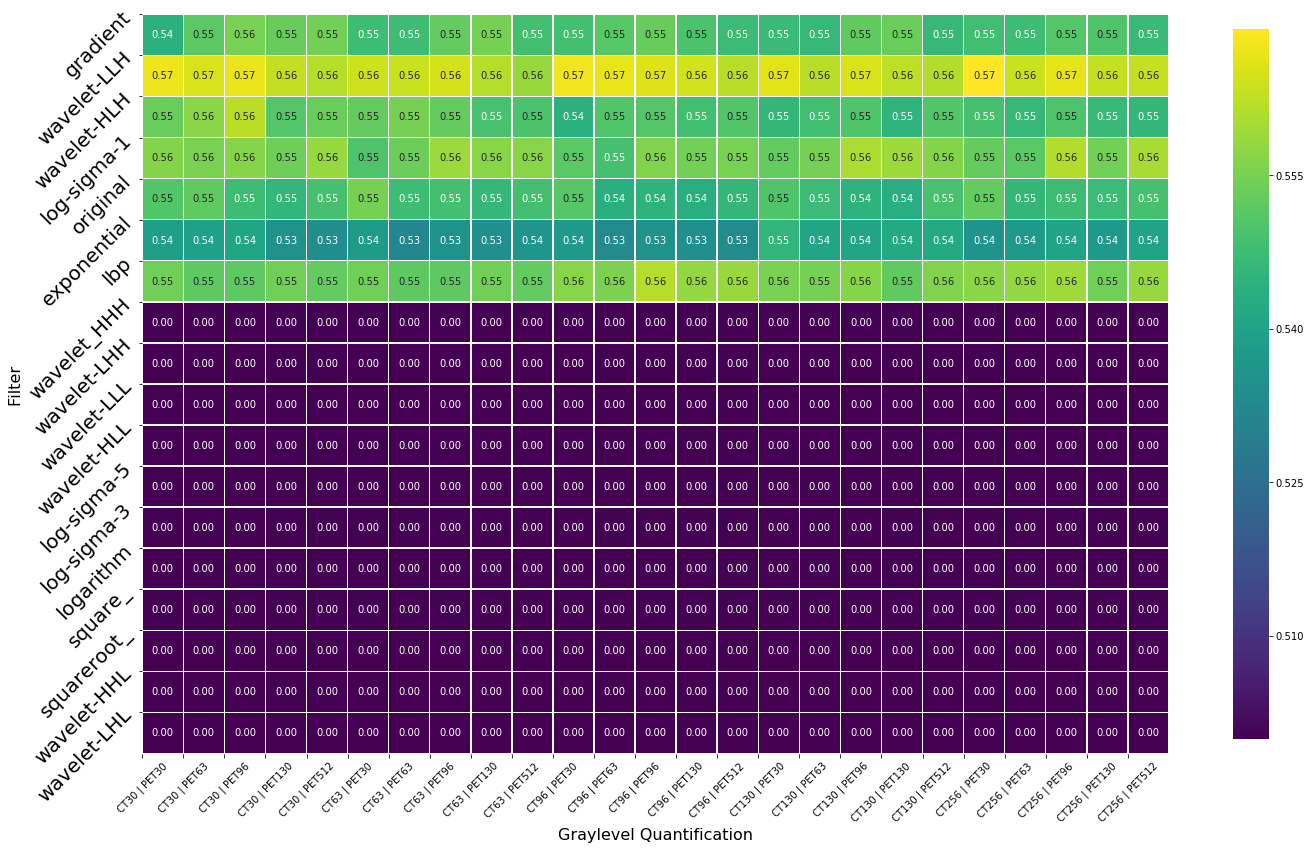

In [21]:
plt.figure(figsize=(20, 20))
ax = sns.heatmap(
    img_prep_results, 
    vmin=0.5, #np.min(img_prep_results), 
    vmax=np.max(img_prep_results),
    cmap=plt.cm.viridis,
    annot=True, fmt = '.2f', square=1, linewidth=.5, cbar=True,
    cbar_kws={'shrink': 0.5}, 
    #annot_kws={'size': 10}
)
#plt.axis('off')
plt.ylabel('Filter', fontsize=16)
plt.xlabel('Graylevel Quantification', fontsize=16)

plt.yticks(
    np.arange(len(results.keys())), results.keys(), 
    rotation='45', fontsize=20
)
plt.xticks(
    np.arange(np.size(discr_labels)), discr_labels, 
    rotation='45', fontsize=20
)
for num, value in enumerate(ax.texts): 
    #value.set_text('{} +/- {}'.format(value.get_text(), std_labels.ravel()[num]))
    value.set_text('{}'.format(value.get_text()))
plt.tight_layout()

## Optimal classifier and feature selector

In [22]:
# NOTE: A list with all 25 diff discr/filter combos.
best_filter = results['wavelet-HLH']
best_result = best_filter[0]

num_models, num_fs = 8, 7
avg_scores = np.zeros((num_models, num_fs), dtype=float)
std_scores = np.zeros((num_models, num_fs), dtype=float)

models = best_result.groupby('model')
for model_num, (model_name, model) in enumerate(models):
    
    selectors = model.groupby('selector')
    for fs_num, (fs_name, selector) in enumerate(selectors):
        
        avg_scores[model_num, fs_num] = np.mean(selector['avg_test_score'])
        std_scores[model_num, fs_num] = np.std(selector['avg_test_score'])

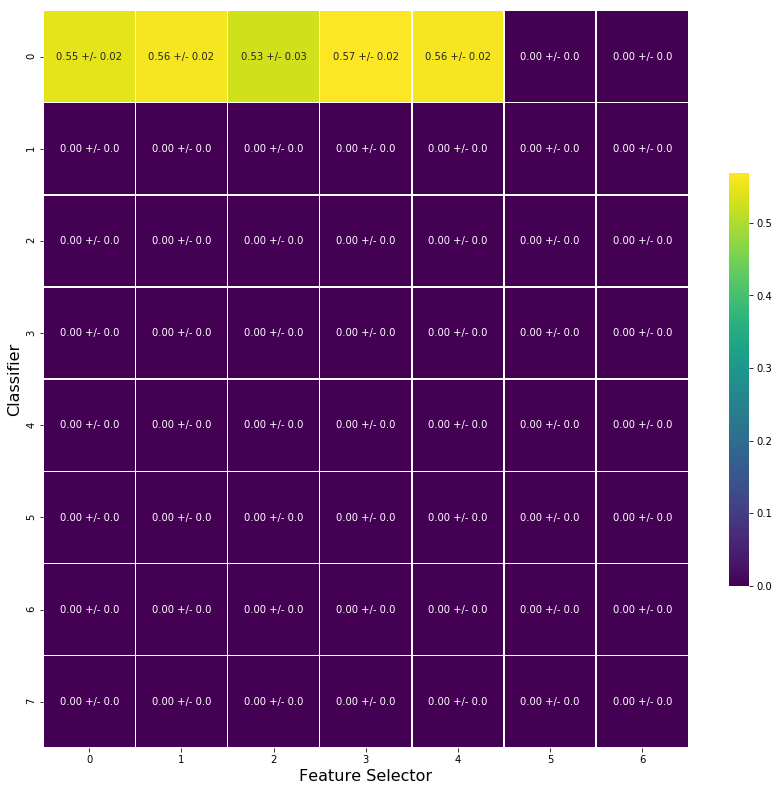

In [24]:
plt.figure(figsize=(12, 12))
ax = sns.heatmap(
    avg_scores, 
    vmin=np.min(img_prep_results), 
    vmax=np.max(img_prep_results),
    cmap=plt.cm.viridis,
    annot=True, fmt = '.2f', square=1, linewidth=.5, cbar=True,
    cbar_kws={'shrink': 0.5}, 
    #annot_kws={'size': 10}
)
#plt.axis('off')
plt.ylabel('Classifier', fontsize=16)
plt.xlabel('Feature Selector', fontsize=16)

#plt.yticks(
#    np.arange(len(results.keys())), results.keys(), rotation='45'
#)
#plt.xticks(
#    np.arange(np.size(discr_labels)), discr_labels, rotation='45'
#)
for num, value in enumerate(ax.texts): 
    value.set_text('{} +/- {}'.format(
        value.get_text(), np.round(std_scores.ravel()[num], decimals=2)
    ))
plt.tight_layout()

## Retrain best model pair

In [25]:
from ReliefF import ReliefF
from sklearn.linear_model import LogisticRegression

In [26]:
best_model = LogisticRegression
best_selector = ReliefF

In [27]:
best_discr_filter = './../../data/to_analysis/exponential/ct1_pet3_clinical.csv'